<a href="https://colab.research.google.com/github/sandepp123/TF_and_Deep_Learning_Study/blob/master/MLP_with_Mnist_99_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train_full,y_train_full),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
from sklearn.model_selection import train_test_split
#   X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.


In [6]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

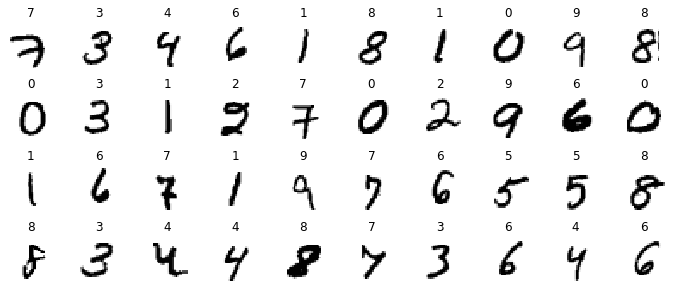

In [8]:
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()



In [9]:
import numpy as np
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape = [28,28]),
                                 keras.layers.Dense(300,activation="relu"),
                                 keras.layers.Dense(100,activation="relu"),
                                #  keras.layers.Dense(50,activation="relu"),?

                                 keras.layers.Dense(10,activation="softmax")
])

In [10]:
import numpy as np
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)



expon_lr = ExponentialLearningRate(factor=1.005)


model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])


In [11]:


history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),callbacks=[expon_lr])



1719/1719 [==============================] - 6s 3ms/step - loss: 38081929542287021309952.0000 - accuracy: 0.5762 - val_loss: 2.3911 - val_accuracy: 0.1126


Text(0, 0.5, 'Loss')

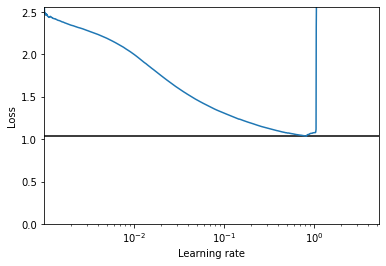

In [12]:
import matplotlib.pyplot as plt 
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [85]:


keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)



In [89]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [90]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

In [91]:
import os
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [92]:


early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])



Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2570 - accuracy: 0.9199 - val_loss: 0.1128 - val_accuracy: 0.9668
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1015 - accuracy: 0.9692 - val_loss: 0.0862 - val_accuracy: 0.9740
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0712 - accuracy: 0.9781 - val_loss: 0.1000 - val_accuracy: 0.9712
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0538 - accuracy: 0.9825 - val_loss: 0.0818 - val_accuracy: 0.9760
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.0834 - val_accuracy: 0.9800
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0348 - accuracy: 0.9882 - val_loss: 0.0737 - val_accuracy: 0.9818
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0760 - val_ac

In [19]:
%kaggle

UsageError: Line magic function `%kaggle` not found.


In [20]:
! pip install -q kaggle

In [22]:
%kaggle competitions download -c digit-recognizer

UsageError: Line magic function `%kaggle` not found.


In [23]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sandepp","key":"9765b28a93a87f3fe3a237e4d90a1d7a"}'}

In [24]:
!mkdir -p ~/.kaggle

In [25]:
!cp kaggle.json ~/.kaggle/

In [26]:
!kaggle datasets list

ref                                                     title                                         size  lastUpdated          downloadCount  
------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                             431KB  2020-11-12 12:51:45           3066  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                      353MB  2020-11-09 18:51:59           1963  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University     2MB  2020-11-13 06:04:14            807  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates      199MB  2020-10-23 16:56:10            374  
etsc9287/2020-general-election-polls                    2020 General Election Polls                  109KB  2020-02-09 08:20:59   

In [28]:
!kaggle competitions download -c digit-recognizer

 55% 5.00M/9.16M [00:00<00:00, 26.6MB/s]
100% 9.16M/9.16M [00:00<00:00, 36.4MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 75.8MB/s]
  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 55.0MB/s]


In [29]:
!unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [35]:
 model.predict_classes(x=X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [37]:
np.argmax(model.predict(X_test), axis=-1)

array([7, 2, 1, ..., 4, 5, 6])

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv("test.csv")

In [41]:
df.shape

(28000, 784)

In [42]:
type(X_test)

numpy.ndarray

In [75]:
test = df.values/255.0

In [77]:
test[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [96]:
f = model.predict_classes(x=test)

In [79]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


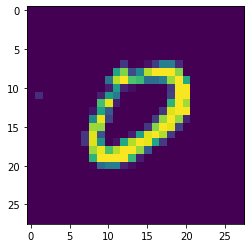

In [80]:
plt.imshow(test[3].reshape(28,28))

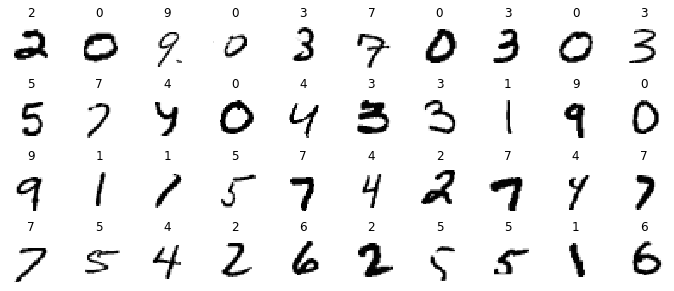

In [81]:
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(test[index].reshape(28,28), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(f[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [82]:
xv = [i for i in range(1,28001)]

In [97]:
df2 = pd.DataFrame()
df2["ImageId"] = xv
df2["Label"] = f

In [98]:
df2.to_csv("submission.csv",index=False)